In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
###Downloading Video from Dataset ----->>>>>http://www.nada.kth.se
!wget http://www.nada.kth.se/cvap/actions/person15_walking_d1_uncomp.avi

--2019-11-16 16:36:50--  http://www.nada.kth.se/cvap/actions/person15_walking_d1_uncomp.avi
Resolving www.nada.kth.se (www.nada.kth.se)... 130.237.227.116
Connecting to www.nada.kth.se (www.nada.kth.se)|130.237.227.116|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3158016 (3.0M) [video/x-msvideo]
Saving to: ‘person15_walking_d1_uncomp.avi’

person15_walking_d1 100%[===================>]   3.01M   655KB/s    in 4.7s    

2019-11-16 16:36:56 (655 KB/s) - ‘person15_walking_d1_uncomp.avi’ saved [3158016/3158016]



In [0]:
mkdir 'image'

In [3]:
cd '/content/image'

/content/image


In [0]:
###Sorting Directory for alphanumeric order
import re
def sorted_aphanumeric(data):
    convert = lambda text: int(text) if text.isdigit() else text.lower()
    alphanum_key = lambda key: [ convert(c) for c in re.split('([0-9]+)', key) ] 
    return sorted(data, key=alphanum_key)

In [0]:
#####Getting each frame from video using Cv2..Extract each fram 1fps
import cv2
vidcap = cv2.VideoCapture('/content/person15_walking_d1_uncomp.avi')
def getFrame(sec):
    vidcap.set(cv2.CAP_PROP_POS_MSEC,sec*1000)
    hasFrames,image = vidcap.read()
    if hasFrames:
        cv2.imwrite("image"+str(count)+".jpg", image)     # save frame as JPG file
    return hasFrames
sec = 0
frameRate = 1 #//it will capture image in each 0.5 second
count=1
success = getFrame(sec)
while success:
    count = count + 1
    sec = sec + frameRate
    sec = round(sec, 2)
    success = getFrame(sec)

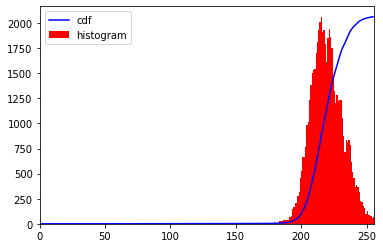

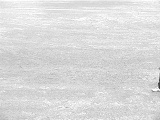

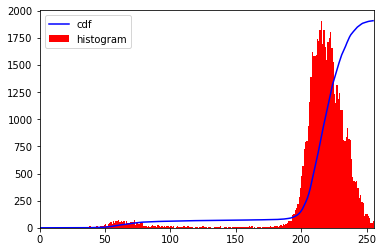

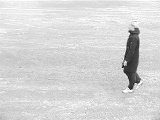

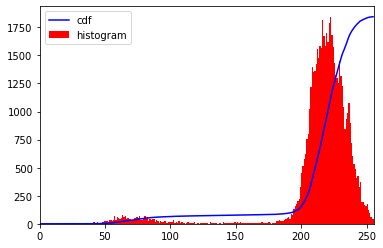

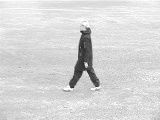

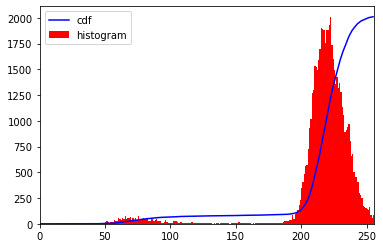

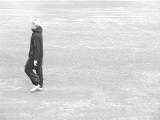

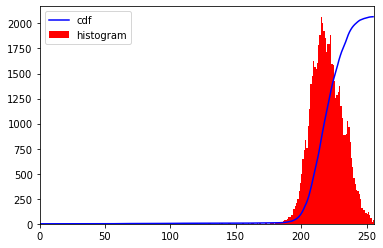

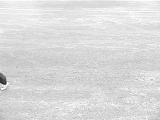

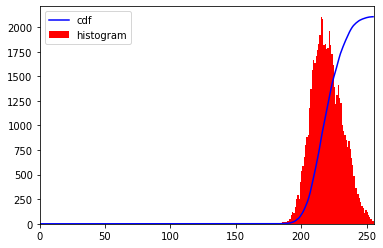

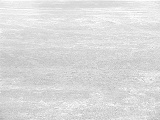

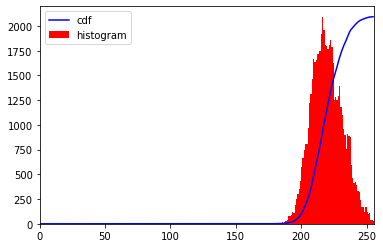

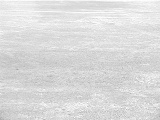

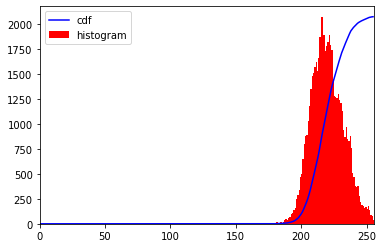

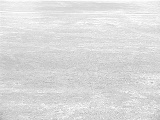

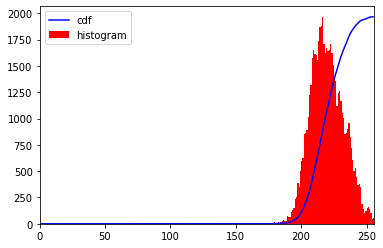

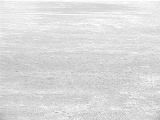

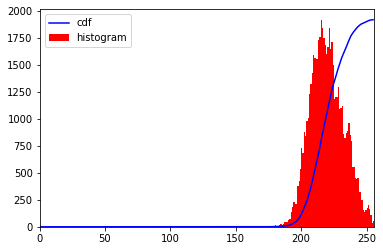

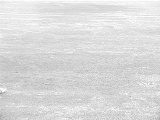

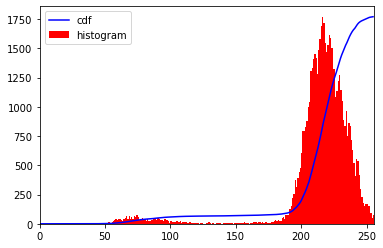

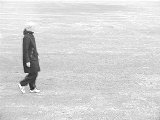

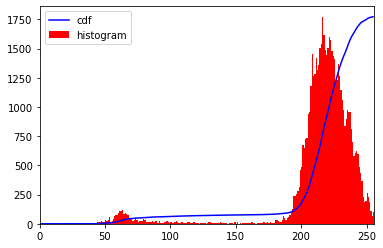

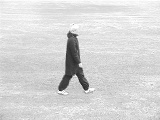

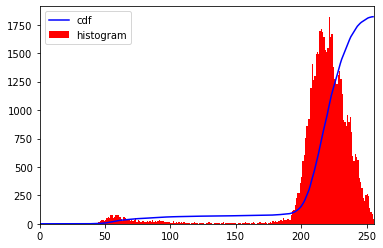

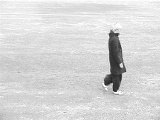

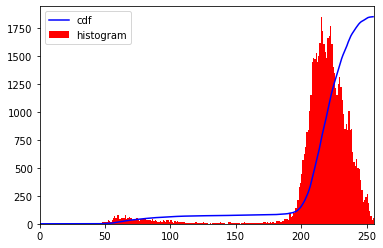

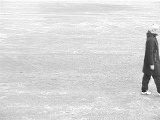

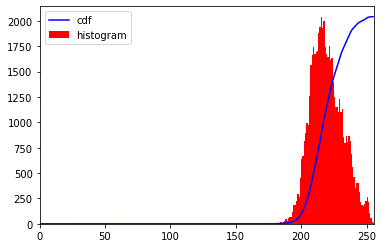

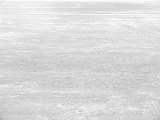

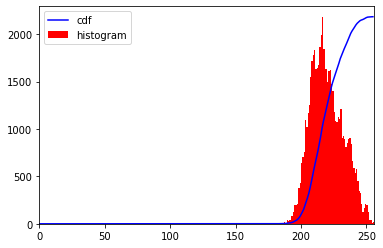

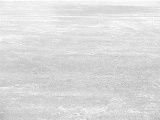

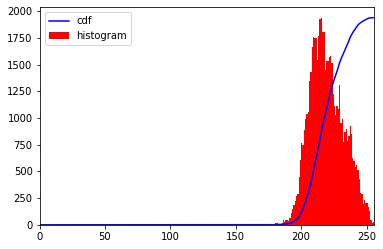

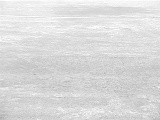

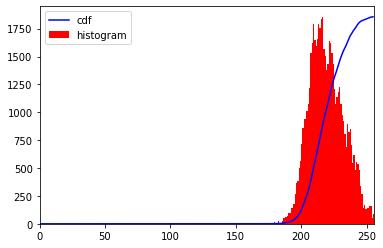

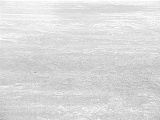

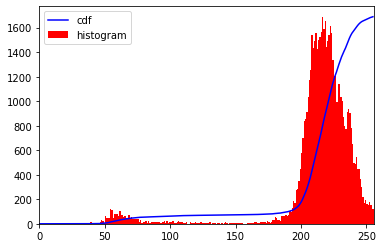

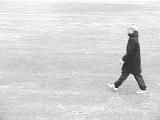

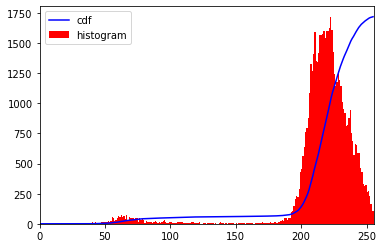

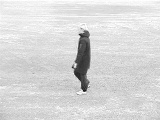

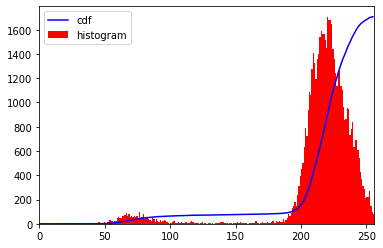

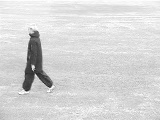

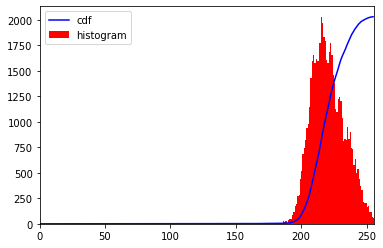

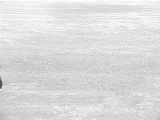

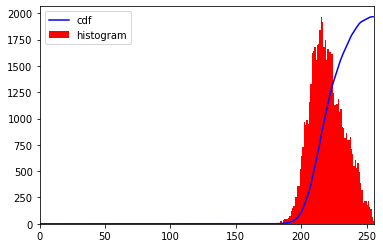

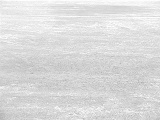

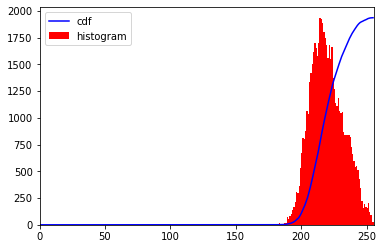

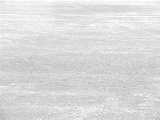

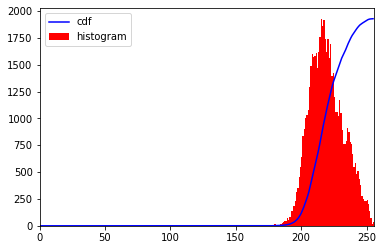

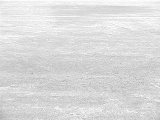

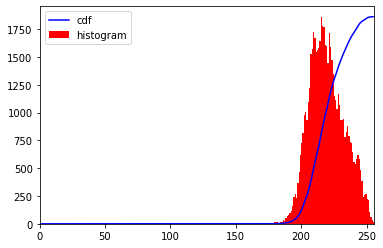

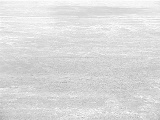

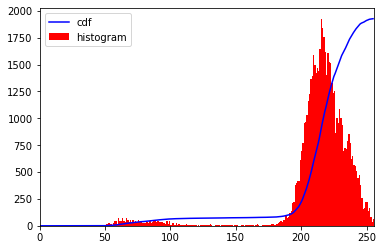

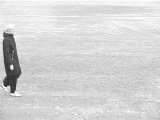

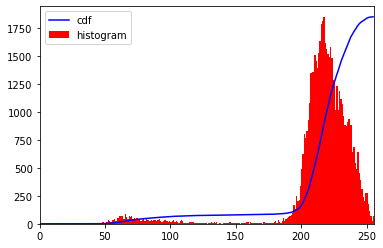

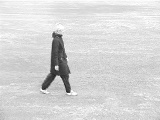

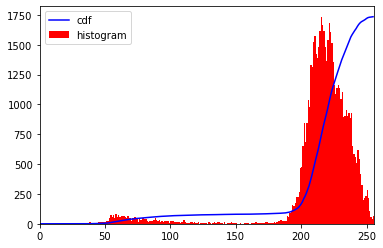

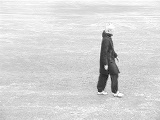

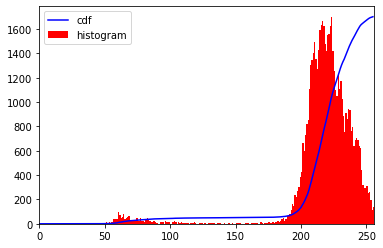

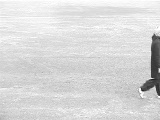

In [8]:
##Calculating Histogram for each consecutive frame
from PIL import  Image
import os
from google.colab.patches import cv2_imshow
import cv2
import matplotlib.pyplot as plt
import numpy as np

from skimage import data
from skimage.util import img_as_ubyte
from skimage.filters.rank import entropy
from skimage.morphology import disk
hist1 ={}

for i in sorted_aphanumeric(os.listdir('.')):
  #print(i)
  Img = cv2.imread(os.path.join('/content/image',i))
  #ret,thresh = cv2.threshold(Img,0,255)


  hist = cv2.calcHist([Img],[0],None,[256],[0,256])
  #print(threshold)
  hist,bins = np.histogram(Img.flatten(),256,[0,256])

  cdf = hist.cumsum()
  cdf_normalized = cdf * hist.max()/ cdf.max()

  plt.plot(cdf_normalized, color = 'b')
  plt.hist(Img.flatten(),256,[0,256], color = 'r')
  plt.xlim([0,256])
  plt.legend(('cdf','histogram'), loc = 'upper left')
  plt.show()
  hist1[i] = hist
  cv2_imshow(Img)

In [0]:
y =np.subtract(x[0],x[1])

In [0]:
###Getting Entropy for each frame
import numpy as np
from skimage import io, color, img_as_ubyte
from skimage.feature import greycomatrix, greycoprops
from sklearn.metrics.cluster import entropy
entrpy = {}
for i in os.listdir('/content/image'):
  #print(i)
  rgbImg = io.imread(os.path.join('/content/image',i))
  grayImg = img_as_ubyte(color.rgb2gray(rgbImg))
  #print(grayImg)
  entrpy[i] = entropy(grayImg)
  #print(entropy(grayImg))

In [0]:
entrpy

{'image1.jpg': 3.9071939944637846,
 'image10.jpg': 3.9554138266186554,
 'image11.jpg': 4.1950202938017265,
 'image12.jpg': 4.199970480151453,
 'image13.jpg': 4.157702955952824,
 'image14.jpg': 4.147725053538926,
 'image15.jpg': 3.9085993951841274,
 'image16.jpg': 3.905069756015538,
 'image17.jpg': 3.9538789292000684,
 'image18.jpg': 3.9740979703619415,
 'image19.jpg': 4.208110637353003,
 'image2.jpg': 4.08878864599547,
 'image20.jpg': 4.171523247422328,
 'image21.jpg': 4.200306861273917,
 'image22.jpg': 3.9353190864925978,
 'image23.jpg': 3.96351928952482,
 'image24.jpg': 3.940665470909456,
 'image25.jpg': 3.9682484301826304,
 'image26.jpg': 3.982261810994514,
 'image27.jpg': 4.186953254779943,
 'image28.jpg': 4.173306675357837,
 'image29.jpg': 4.196973579153921,
 'image3.jpg': 4.127834061217045,
 'image30.jpg': 4.159855806636444,
 'image4.jpg': 4.070857405583964,
 'image5.jpg': 3.913696656569511,
 'image6.jpg': 3.8676385012691608,
 'image7.jpg': 3.8937530617735745,
 'image8.jpg': 3.91